In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from json import dump
import gc

In [2]:
data = pd.read_csv("data/preprocessed2.csv")
data = data.drop("Unnamed: 0", axis=1)

/tmp/ipykernel_146766/2279698442.py:1: DtypeWarning: Columns (6,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/preprocessed2.csv")


In [3]:
data = data.replace("nA", np.nan)
data = data.drop("co_applicant_age", axis=1)

In [4]:
data = data[data["income"] >= 0]

In [5]:
gc.collect()

10

In [6]:
data.isna().sum()[data.isna().sum() > 0]

state_code       57447
county_code      90441
census_tract    108991
dtype: int64

In [7]:
data.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,...,denial_reason_1:_2,denial_reason_1:_3,denial_reason_1:_4,denial_reason_1:_5,denial_reason_1:_6,denial_reason_1:_7,denial_reason_1:_8,denial_reason_1:_9,denial_reason_1:_10,denial_reason_1:_1111
0,2020,0,11244,CA,6059.0,6059042334.0,355000,41.290000,2.875000,0.352146,...,False,False,False,False,False,False,False,False,True,False
1,2020,0,23224,MD,24031.0,24031700706.0,455000,110.116737,3.317022,0.352146,...,False,False,False,False,False,False,False,False,True,False
2,2020,0,28140,KS,20091.0,20091053410.0,325000,56.720000,2.490000,-0.329000,...,False,False,False,False,False,False,False,False,True,False
3,2020,0,99999,CA,6057.0,6057001206.0,315000,42.630000,3.000000,0.352146,...,False,False,False,False,False,False,False,False,True,False
4,2020,0,21660,OR,41039.0,41039005200.0,315000,47.690000,2.500000,0.235000,...,False,False,False,False,False,False,False,False,True,False


In [8]:
[x for x in data.keys()]

['activity_year',
 'lei',
 'derived_msa_md',
 'state_code',
 'county_code',
 'census_tract',
 'loan_amount',
 'combined_loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'total_loan_costs',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'property_value',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_age',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'leifreq',
 'na_age',
 'derived_loan_product_type:_Conventional:Subordinate Lien',
 'derived_loan_product_type:_FHA:First Lien',
 'derived_loan_product_type:_FHA:Subordinate Lien',
 'derived_loan_product_type:_FSA/RHS:First Lien',
 'derived_loan_product_type:_FSA/RHS:Subordinate Lien',
 'derived_loan_product_type:_VA:First Lien',
 'derived_loan_product_type:_VA:Subordinate Lien',
 'conforming_loan

In [16]:
toLog = ["loan_amount", "combined_loan_to_value_ratio", "loan_term", "property_value"]
toLogp1 = ["total_loan_costs", "origination_charges", "discount_points", "income", "tract_owner_occupied_units", "tract_one_to_four_family_homes", "total_loan_costs", "tract_population"]
toClip = {"interest_rate": (0, 25), "rate_spread": (-100, 100)}

In [17]:
for feature in toLog:
    data[feature] = np.log(data[feature])
for feature in toLogp1:
    data[feature] = np.log(data[feature] + 1)
for feature in toClip:
    data[feature] = data[feature].clip(toClip[feature][0], toClip[feature][1])

In [19]:
(data["tract_population"] <= 0).sum()

109118

In [24]:
numerics = data.drop(["state_code", "county_code", "census_tract", "derived_msa_md", "activity_year", "lei"], axis=1)
others = data[["state_code", "county_code", "census_tract", "derived_msa_md", "activity_year", "lei"]]

In [22]:
data.to_csv("data/cliplog.csv")

In [25]:
del data

In [26]:
numerics

,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,origination_charges,discount_points,lender_credits,loan_term,property_value,...,denial_reason_1:_2,denial_reason_1:_3,denial_reason_1:_4,denial_reason_1:_5,denial_reason_1:_6,denial_reason_1:_7,denial_reason_1:_8,denial_reason_1:_9,denial_reason_1:_10,denial_reason_1:_1111
0,12.779873,3.720620,2.875000,0.352146,1.757132,0.000000,0.000000,0.00,5.192957,13.658857,...,False,False,False,False,False,False,False,False,True,False
1,13.028053,4.701541,3.317022,0.352146,0.000000,7.579482,0.000000,0.00,5.886104,13.034563,...,False,False,False,False,False,False,False,False,True,False
2,12.691580,4.038127,2.490000,-0.329000,1.910393,5.755742,0.000000,315.00,5.886104,13.279367,...,False,False,False,False,False,False,False,False,True,False
3,12.660328,3.752558,3.000000,0.352146,2.056341,5.681980,0.000000,292.53,5.886104,13.507626,...,False,False,False,False,False,False,False,False,True,False
4,12.660328,3.864722,2.500000,0.235000,2.308322,9.050876,0.000000,8525.00,5.192957,13.392391,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709246,13.151922,4.317488,2.990000,0.196000,2.020931,0.000000,0.000000,0.00,5.886104,13.437174,...,False,False,False,False,False,False,False,False,True,False
7709247,12.959844,4.701541,2.625000,-0.265000,2.172891,7.774898,0.000000,2379.10,5.886104,13.034563,...,False,False,False,False,False,False,False,False,True,False
7709248,13.534473,4.701541,3.317022,0.352146,0.000000,7.579482,0.000000,0.00,5.886104,13.034563,...,False,False,False,False,False,False,False,False,True,False
7709249,12.983101,4.701541,3.317022,0.352146,0.000000,7.579482,0.000000,0.00,5.886104,13.034563,...,False,False,False,False,False,False,False,False,True,False


In [10]:
[x for x in numerics.keys()]

['loan_amount',
 'combined_loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'total_loan_costs',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'property_value',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_age',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'leifreq',
 'na_age',
 'derived_loan_product_type:_Conventional:Subordinate Lien',
 'derived_loan_product_type:_FHA:First Lien',
 'derived_loan_product_type:_FHA:Subordinate Lien',
 'derived_loan_product_type:_FSA/RHS:First Lien',
 'derived_loan_product_type:_FSA/RHS:Subordinate Lien',
 'derived_loan_product_type:_VA:First Lien',
 'derived_loan_product_type:_VA:Subordinate Lien',
 'conforming_loan_limit:_NC',
 'conforming_loan_limit:_U',
 'derived_ethnicity:_Free Form Text Only',
 'derive

In [27]:
X = numerics.to_numpy(dtype="float64")

In [28]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X = ((X.T - means.reshape((-1, 1))) / stds.reshape((-1, 1))).T

In [29]:
keys = numerics.keys()

In [30]:
del numerics

In [31]:
cvar = np.cov(X, rowvar=False)

In [32]:
cvar

array([[ 1.00000013,  0.0869115 , -0.19606605, ..., -0.02524337,
         0.16435801, -0.04848443],
       [ 0.0869115 ,  1.00000013,  0.04890553, ..., -0.04211624,
         0.0605081 ,  0.09308493],
       [-0.19606605,  0.04890553,  1.00000013, ...,  0.00115673,
        -0.00742832,  0.00999175],
       ...,
       [-0.02524337, -0.04211624,  0.00115673, ...,  1.00000013,
        -0.28182313, -0.01441878],
       [ 0.16435801,  0.0605081 , -0.00742832, ..., -0.28182313,
         1.00000013, -0.34281589],
       [-0.04848443,  0.09308493,  0.00999175, ..., -0.01441878,
        -0.34281589,  1.00000013]])

In [33]:
np.argwhere(keys == "leifreq")

array([[21]])

In [134]:
cutoff = 0.09
np.array(keys)[np.argwhere((cvar[:, 21] > cutoff) | (cvar[:, 21] < -cutoff))]

array([['total_loan_costs'],
       ['discount_points'],
       ['income'],
       ['leifreq'],
       ['derived_loan_product_type:_Conventional:Subordinate Lien'],
       ['derived_race:_Race Not Available'],
       ['derived_race:_White'],
       ['derived_sex:_Sex Not Available'],
       ['action_taken:_6'],
       ['purchaser_type:_1'],
       ['purchaser_type:_2'],
       ['purchaser_type:_3'],
       ['purchaser_type:_6'],
       ['purchaser_type:_71'],
       ['loan_purpose:_5'],
       ['loan_purpose:_31'],
       ['lien_status:_2'],
       ['reverse_mortgage:_2'],
       ['reverse_mortgage:_1111'],
       ['open_end_line_of_credit:_2'],
       ['open_end_line_of_credit:_1111'],
       ['business_or_commercial_purpose:_2'],
       ['business_or_commercial_purpose:_1111'],
       ['negative_amortization:_2'],
       ['negative_amortization:_1111'],
       ['interest_only_payment:_2'],
       ['interest_only_payment:_1111'],
       ['balloon_payment:_2'],
       ['balloon_payment

(array([6.106861e+06, 5.078000e+03, 1.652900e+04, 7.224500e+04,
        3.240270e+05, 6.739760e+05, 4.776930e+05, 2.942500e+04,
        2.050000e+02, 3.000000e+00]),
 array([-0.50342771, -0.06223435,  0.37895901,  0.82015237,  1.26134573,
         1.7025391 ,  2.14373246,  2.58492582,  3.02611918,  3.46731254,
         3.9085059 ]),
 <BarContainer object of 10 artists>)

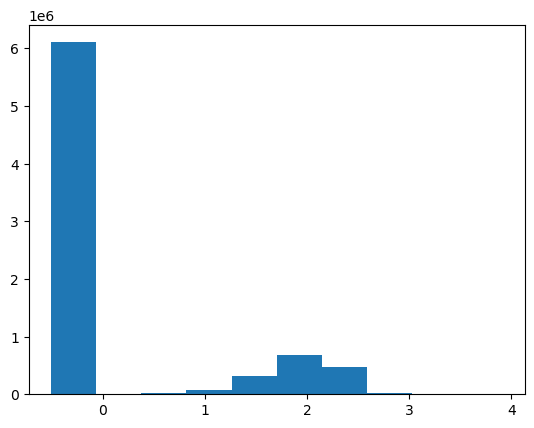

In [45]:
plt.hist(X[:, 6])

[None]

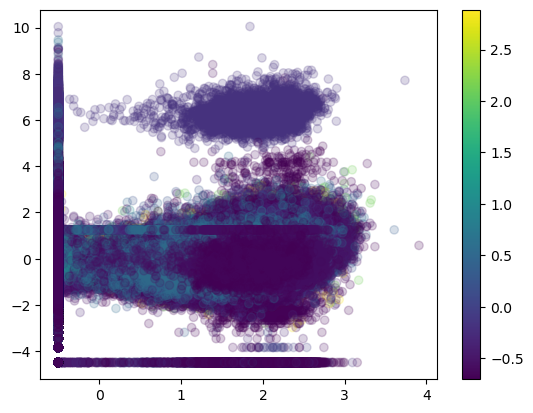

In [138]:
S = plt.scatter(X[:, 6], X[:, 11], c=X[:, 21], alpha=0.2)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)

[None]

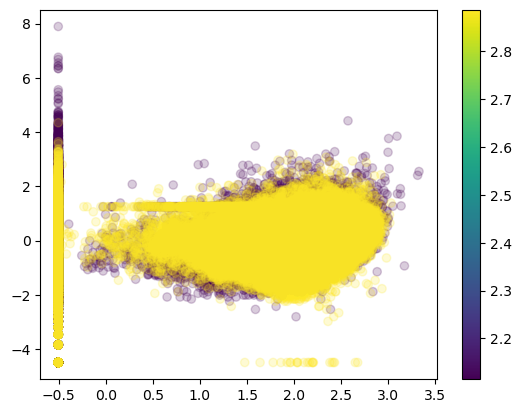

In [149]:
subset = X[:, 21] > 2
S = plt.scatter(X[:, 6][subset], X[:, 11][subset], c=X[:, 21][subset], alpha=0.2)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)

In [139]:
keys[6]

'discount_points'

In [140]:
keys[11]

'income'

In [ ]:
X[:, 46]

array([-1.12998089e+00, -7.87874995e-16, -9.48062571e-01, ...,
       -7.87874995e-16, -7.87874995e-16, -9.45481063e-01])

In [144]:
keys[21]

'leifreq'